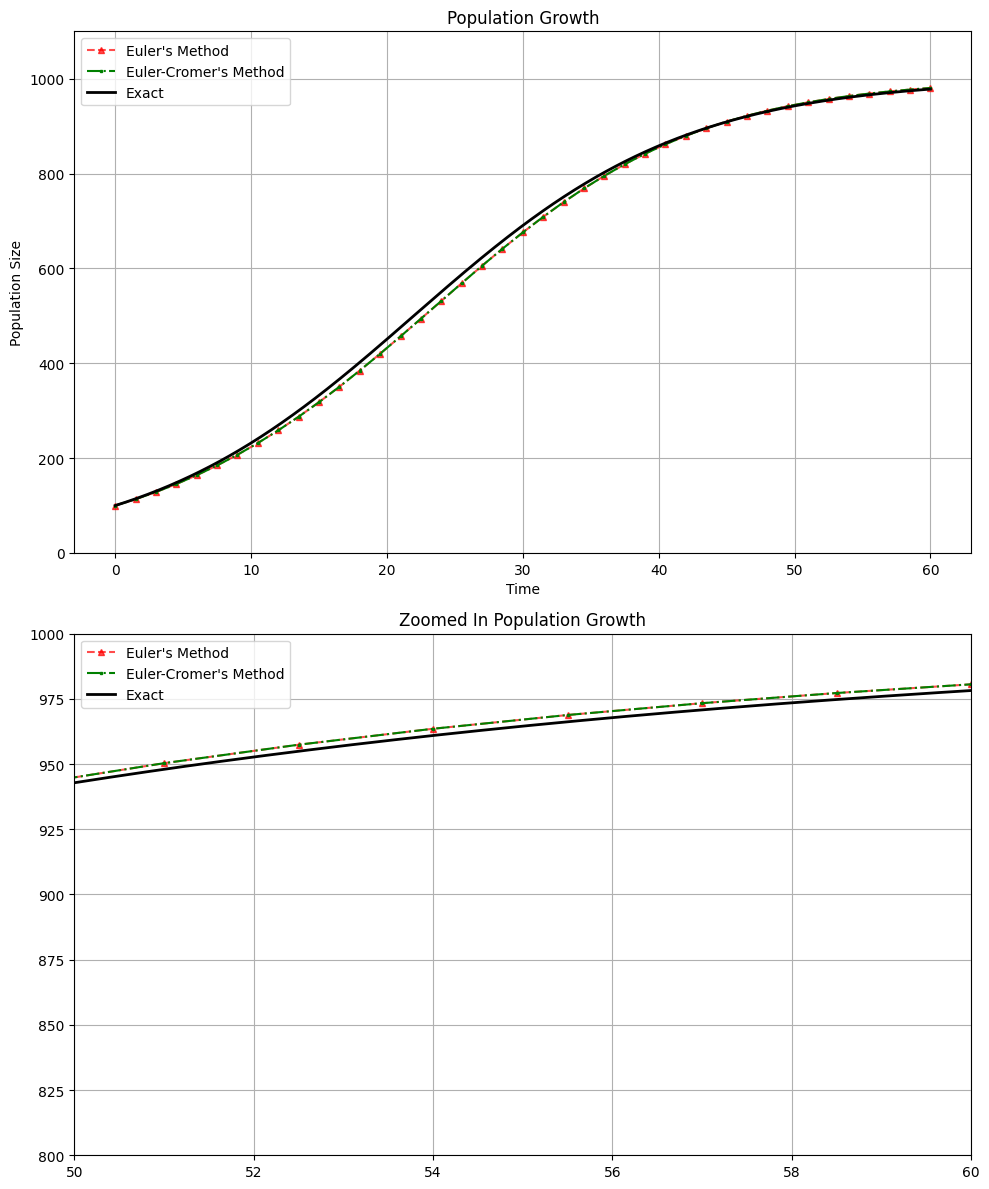

Time   |   Exact Population   |   Euler's Method Population   |   Euler-Cromer's Method Population   |   Euler's Method Error   |   Euler-Cromer's Method Error
------------------------------------------------------------------------------------------------------------------------
0.00  |  100.0000  |  100.0000  |  100.0000  |  0.0000  |  0.0000
1.50  |  100.5418  |  113.5000  |  113.5000  |  12.9582  |  12.9582
3.00  |  101.0863  |  128.5927  |  128.5927  |  27.5064  |  27.5064
4.50  |  101.6333  |  145.4012  |  145.4012  |  43.7678  |  43.7678
6.00  |  102.1830  |  164.0401  |  164.0401  |  61.8571  |  61.8571
7.50  |  102.7354  |  184.6097  |  184.6097  |  81.8744  |  81.8744
9.00  |  103.2903  |  207.1891  |  207.1891  |  103.8988  |  103.8988
10.50  |  103.8479  |  231.8284  |  231.8284  |  127.9804  |  127.9804
12.00  |  104.4082  |  258.5409  |  258.5409  |  154.1328  |  154.1328
13.50  |  104.9711  |  287.2956  |  287.2956  |  182.3244  |  182.3244
15.00  |  105.5368  |  318.009

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Define the logistic growth function
def logistic_growth(P, t, r, K):
    return r * P * (1 - P / K)

# Define a general method for numerical integration
def numerical_integration(method, func, t0, t_end, P0, dt, r, K):
    t = np.arange(t0, t_end, dt)
    P = np.zeros_like(t)
    P[0] = P0
    
    for i in range(1, len(t)):
        P[i] = method(P, t, i, func, dt, r, K)  # Pass the current time index to the method
    
    return t, P

# Define Euler's method
def euler_method(P, t, i, func, dt, r, K):
    return P[i-1] + func(P[i-1], t[i-1], r, K) * dt

# Define Euler-Cromer's method
def euler_cromer_method(P, t, i, func, dt, r, K):
    dPdt = func(P[i-1], t[i-1], r, K)
    return P[i-1] + dPdt * dt

# Initial parameters
r = 0.1  # Growth rate
K = 1000  # Carrying capacity
P0 = 100  # Initial population size
t0 = 0    # Initial time
t_end = 60  # End time
dt = 1.5  # Time step size

# Exact solution
t_exact = np.linspace(t0, t_end, 1000)
P_exact = K * P0 / (P0 + (K - P0) * np.exp(-r * (t_exact - t0)))

# Using Euler's method
t_euler, P_euler = numerical_integration(euler_method, logistic_growth, t0, t_end+dt, P0, dt, r, K)

# Using Euler-Cromer's method
t_ec, P_ec = numerical_integration(euler_cromer_method, logistic_growth, t0, t_end+dt, P0, dt, r, K)

# Calculate errors
errors_euler = np.abs(P_exact[:len(t_euler)] - P_euler)
errors_ec = np.abs(P_exact[:len(t_ec)] - P_ec)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting Euler's method with larger, red circle markers
ax1.plot(t_euler, P_euler, label="Euler's Method", linestyle='dashed', marker='^', markersize=5, color='red', alpha=0.7)

# Plotting Euler-Cromer's method with larger, green square markers
ax1.plot(t_ec, P_ec, label="Euler-Cromer's Method", linestyle='-.', marker='s', markersize=2, color='green')

# Plotting original growth curve with a solid black line
ax1.plot(t_exact, P_exact, label='Exact', color='black', linewidth=2)

ax1.set_xlabel('Time')
ax1.set_ylabel('Population Size')
ax1.set_title('Population Growth')
ax1.legend()
ax1.set_ylim(0, 1100)
ax1.grid(True)

# Zoomed in subplot
zoom_region = (50, 60)  # Define the region you want to zoom in on
ax2.plot(t_euler, P_euler, label="Euler's Method", linestyle='dashed', marker='^', markersize=5, color='red', alpha=0.7)
ax2.plot(t_ec, P_ec, label="Euler-Cromer's Method", linestyle='-.', marker='s', markersize=2, color='green')
ax2.plot(t_exact, P_exact, label='Exact', color='black', linewidth=2)
ax2.set_xlim(*zoom_region)  # Only show the zoom region
ax2.set_ylim(800, 1000)  # Adjust y-axis limit to focus on differences
ax2.set_title('Zoomed In Population Growth')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Display table
print("Time   |   Exact Population   |   Euler's Method Population   |   Euler-Cromer's Method Population   |   Euler's Method Error   |   Euler-Cromer's Method Error")
print("-" * 120)
for i in range(len(t_euler)):
    print("{:.2f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}".format(t_euler[i], P_exact[i], P_euler[i], P_ec[i], errors_euler[i], errors_ec[i]))


C:\Users\shiva\AppData\Local\Temp\ipykernel_24000\2294286929.py:10: RuntimeWarning: overflow encountered in divide
  a = lorentz_force(q, v, B) / m
C:\Users\shiva\AppData\Local\Temp\ipykernel_24000\2294286929.py:17: RuntimeWarning: overflow encountered in divide
  a = lorentz_force(q, v, B) / m


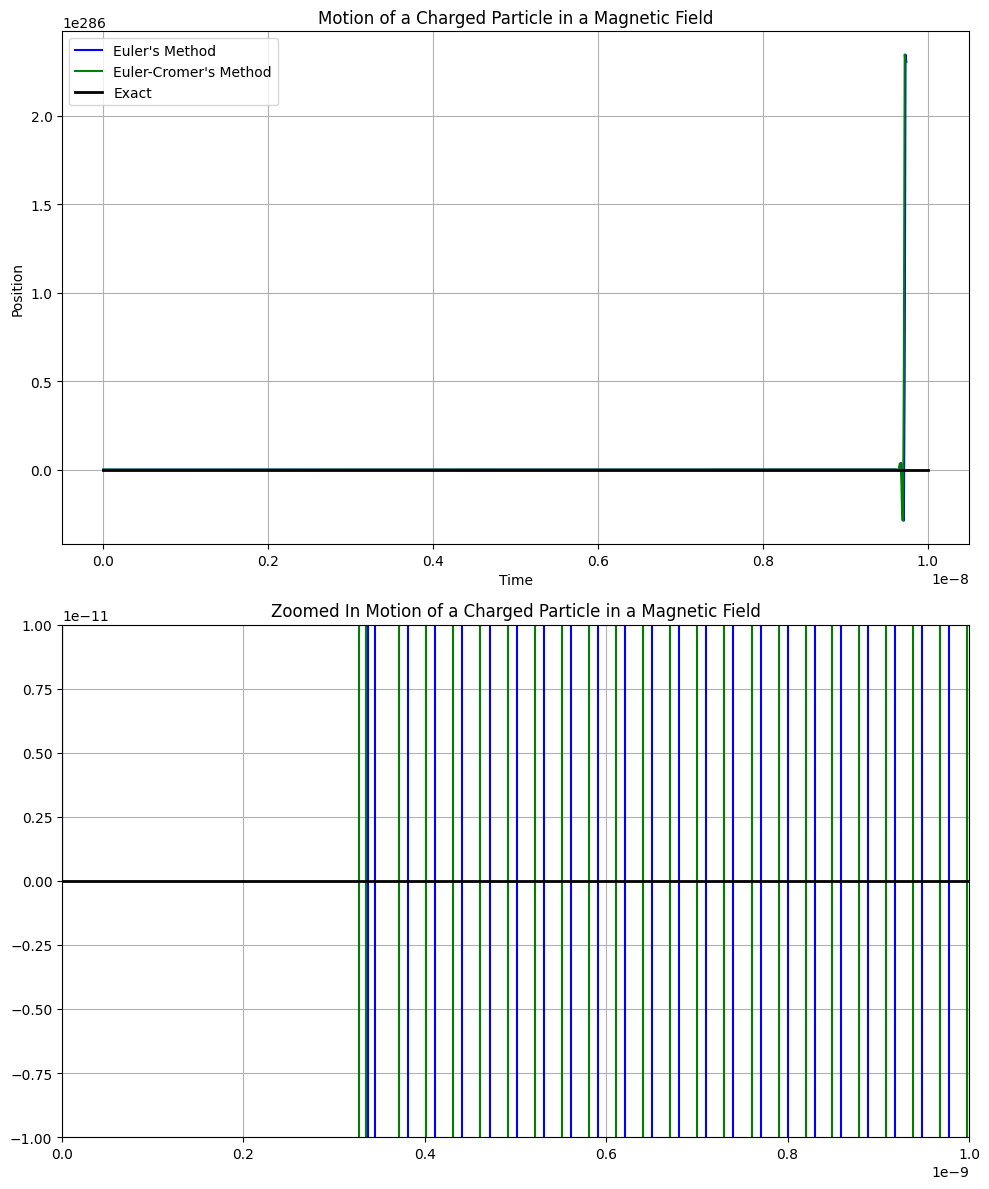

Time   |   Euler's Method Position   |   Euler-Cromer's Method Position   |   Exact Position   |   Euler's Method Error   |   Euler-Cromer's Method Error
------------------------------------------------------------------------------------------------------------------------
0.00e+00  |  0.0000  |  0.0000  |  0.0000  |  0.0000  |  0.0000
1.00e-11  |  0.1000  |  0.1000  |  0.0000  |  0.1732  |  0.1732
2.00e-11  |  0.1000  |  0.1000  |  0.0000  |  0.1732  |  0.1732
3.00e-11  |  0.1000  |  0.1000  |  0.0000  |  0.1732  |  0.1732
4.00e-11  |  0.1000  |  0.1000  |  0.0000  |  0.1732  |  0.1732
5.00e-11  |  0.1000  |  0.1000  |  0.0000  |  0.1732  |  0.1732
6.00e-11  |  0.1000  |  0.1000  |  0.0000  |  0.1732  |  0.1732
7.00e-11  |  0.1000  |  0.1000  |  0.0000  |  0.1732  |  0.1732
8.00e-11  |  0.1000  |  0.1000  |  0.0000  |  0.1732  |  0.1732
9.00e-11  |  0.1000  |  0.1000  |  0.0000  |  0.1732  |  0.1732
1.00e-10  |  0.1000  |  0.1000  |  0.0000  |  0.1732  |  0.1732
1.10e-10  |  0.1000  

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Lorentz force
def lorentz_force(q, v, B):
    return q * np.cross(v, B)

# Define Euler's method
def euler(q, m, v, B, dt):
    a = lorentz_force(q, v, B) / m
    v_new = v + a * dt
    r_new = r + v * dt
    return r_new, v_new

# Define Euler-Cromer's method
def euler_cromer(q, m, v, B, dt):
    a = lorentz_force(q, v, B) / m
    v_new = v + a * dt
    r_new = r + v_new * dt  # Use updated velocity
    return r_new, v_new

# Initial parameters
q = 1.6e-19  # Charge of the particle
m = 9.1e-31  # Mass of the particle
B = np.array([0, 0, 1])  # Magnetic field
v0 = np.array([1, 0, 0])  # Initial velocity
r0 = np.array([0, 0, 0])  # Initial position
dt = 1e-11  # Time step size
t_end = 1e-8  # End time

# Exact solution for motion in a uniform magnetic field
omega = q * np.linalg.norm(B) / m  # Cyclotron frequency
t_exact = np.arange(0, t_end, dt)
r_exact = np.zeros((len(t_exact), 3))
r_exact[:, 0] = r0[0] + v0[1]/omega * np.sin(omega * t_exact) - v0[1]/omega
r_exact[:, 1] = r0[1] - v0[0]/omega * np.sin(omega * t_exact) + v0[0]/omega

# Using Euler's method
t_euler = np.arange(0, t_end, dt)
r_euler = np.zeros((len(t_euler), 3))
v_euler = np.zeros((len(t_euler), 3))
r_euler[0, :] = r0
v_euler[0, :] = v0
for i in range(1, len(t_euler)):
    r_euler[i, :], v_euler[i, :] = euler(q, m, v_euler[i-1, :], B, dt)

# Using Euler-Cromer's method
t_ec = np.arange(0, t_end, dt)
r_ec = np.zeros((len(t_ec), 3))
v_ec = np.zeros((len(t_ec), 3))
r_ec[0, :] = r0
v_ec[0, :] = v0
for i in range(1, len(t_ec)):
    r_ec[i, :], v_ec[i, :] = euler_cromer(q, m, v_ec[i-1, :], B, dt)

# Calculate errors
errors_euler = np.linalg.norm(r_euler - r_exact, axis=1)
errors_ec = np.linalg.norm(r_ec - r_exact, axis=1)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting Euler's method with larger, red circle markers
ax1.plot(t_euler, r_euler[:, 0], label="Euler's Method", linestyle='-', color='blue')
ax1.plot(t_ec, r_ec[:, 0], label="Euler-Cromer's Method", linestyle='-', color='green')
ax1.plot(t_exact, r_exact[:, 0], label='Exact', color='black', linewidth=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.set_title('Motion of a Charged Particle in a Magnetic Field')
ax1.legend()
ax1.grid(True)

# Zoomed in subplot
zoom_region = (0, 1e-9)  # Define the region you want to zoom in on
ax2.plot(t_euler, r_euler[:, 0], label="Euler's Method", linestyle='-', color='blue')
ax2.plot(t_ec, r_ec[:, 0], label="Euler-Cromer's Method", linestyle='-', color='green')
ax2.plot(t_exact, r_exact[:, 0], label='Exact', color='black', linewidth=2)
ax2.set_xlim(*zoom_region)  # Only show the zoom region
ax2.set_ylim(-1e-11, 1e-11)  # Adjust y-axis limit to focus on differences
ax2.set_title('Zoomed In Motion of a Charged Particle in a Magnetic Field')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Display table
print("Time   |   Euler's Method Position   |   Euler-Cromer's Method Position   |   Exact Position   |   Euler's Method Error   |   Euler-Cromer's Method Error")
print("-" * 120)
for i in range(len(t_euler)):
    print("{:.2e}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}".format(t_euler[i], r_euler[i, 0], r_ec[i, 0], r_exact[i, 0], errors_euler[i], errors_ec[i]))


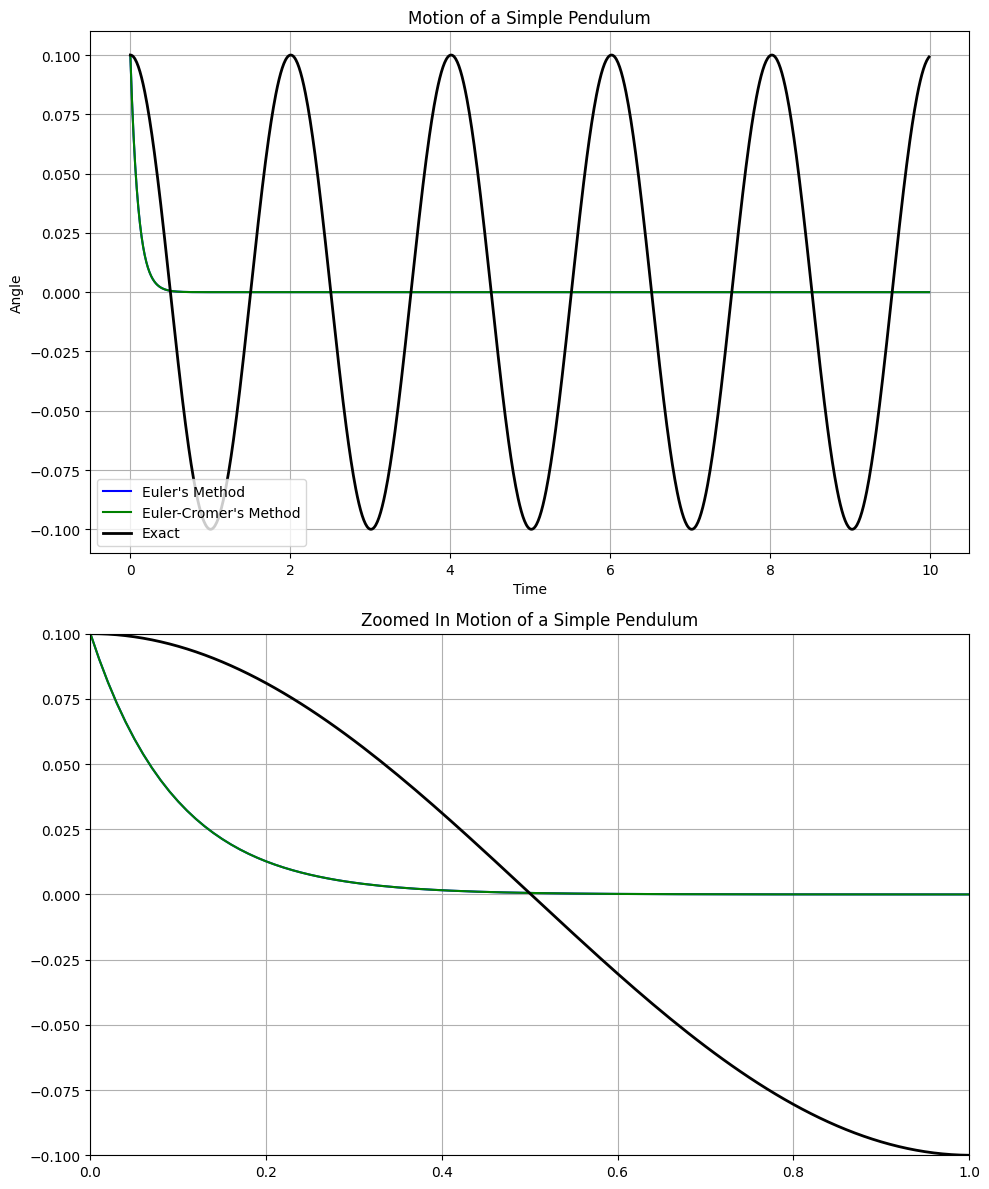

Time   |   Euler's Method Angle   |   Euler-Cromer's Method Angle   |   Exact Angle   |   Euler's Method Error   |   Euler-Cromer's Method Error
------------------------------------------------------------------------------------------------------------------------
0.00e+00  |  0.1000  |  0.1000  |  0.1000  |  0.0000  |  0.0000
1.00e-02  |  0.0902  |  0.0902  |  0.1000  |  0.0098  |  0.0098
2.00e-02  |  0.0813  |  0.0813  |  0.0998  |  0.0185  |  0.0185
3.00e-02  |  0.0734  |  0.0734  |  0.0996  |  0.0262  |  0.0262
4.00e-02  |  0.0662  |  0.0662  |  0.0992  |  0.0331  |  0.0331
5.00e-02  |  0.0597  |  0.0597  |  0.0988  |  0.0391  |  0.0391
6.00e-02  |  0.0538  |  0.0538  |  0.0982  |  0.0444  |  0.0444
7.00e-02  |  0.0485  |  0.0485  |  0.0976  |  0.0491  |  0.0491
8.00e-02  |  0.0438  |  0.0438  |  0.0969  |  0.0531  |  0.0531
9.00e-02  |  0.0395  |  0.0395  |  0.0961  |  0.0566  |  0.0566
1.00e-01  |  0.0356  |  0.0356  |  0.0951  |  0.0595  |  0.0595
1.10e-01  |  0.0321  |  0.0321

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define the pendulum's motion
def pendulum(theta, t, g, L):
    return -g/L * theta

# Define Euler's method
def euler(func, theta, t, dt, g, L):
    a = func(theta, t, g, L)
    theta_new = theta + a * dt
    return theta_new

# Define Euler-Cromer's method
def euler_cromer(func, theta, t, dt, g, L):
    a = func(theta, t, g, L)
    theta_new = theta + a * dt
    return theta_new

# Initial parameters
g = 9.81  # Acceleration due to gravity
L = 1  # Length of the pendulum
theta0 = 0.1  # Initial angle
t0 = 0  # Initial time
t_end = 10  # End time
dt = 0.01  # Time step size

# Exact solution
t_exact = np.arange(t0, t_end, dt)
theta_exact = theta0 * np.cos(np.sqrt(g/L) * t_exact)

# Using Euler's method
t_euler = np.arange(t0, t_end, dt)
theta_euler = np.zeros_like(t_euler)
theta_euler[0] = theta0
for i in range(1, len(t_euler)):
    theta_euler[i] = euler(pendulum, theta_euler[i-1], t_euler[i-1], dt, g, L)

# Using Euler-Cromer's method
t_ec = np.arange(t0, t_end, dt)
theta_ec = np.zeros_like(t_ec)
theta_ec[0] = theta0
for i in range(1, len(t_ec)):
    theta_ec[i] = euler_cromer(pendulum, theta_ec[i-1], t_ec[i-1], dt, g, L)

# Calculate errors
errors_euler = np.abs(theta_exact - theta_euler)
errors_ec = np.abs(theta_exact - theta_ec)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting Euler's method with larger, red circle markers
ax1.plot(t_euler, theta_euler, label="Euler's Method", linestyle='-', color='blue')
ax1.plot(t_ec, theta_ec, label="Euler-Cromer's Method", linestyle='-', color='green')
ax1.plot(t_exact, theta_exact, label='Exact', color='black', linewidth=2)
ax1.set_xlabel('Time')
ax1.set_ylabel('Angle')
ax1.set_title('Motion of a Simple Pendulum')
ax1.legend()
ax1.grid(True)

# Zoomed in subplot
zoom_region = (0, 1)  # Define the region you want to zoom in on
ax2.plot(t_euler, theta_euler, label="Euler's Method", linestyle='-', color='blue')
ax2.plot(t_ec, theta_ec, label="Euler-Cromer's Method", linestyle='-', color='green')
ax2.plot(t_exact, theta_exact, label='Exact', color='black', linewidth=2)
ax2.set_xlim(*zoom_region)  # Only show the zoom region
ax2.set_ylim(-0.1, 0.1)  # Adjust y-axis limit to focus on differences
ax2.set_title('Zoomed In Motion of a Simple Pendulum')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Display table
print("Time   |   Euler's Method Angle   |   Euler-Cromer's Method Angle   |   Exact Angle   |   Euler's Method Error   |   Euler-Cromer's Method Error")
print("-" * 120)
for i in range(len(t_euler)):
    print("{:.2e}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}".format(t_euler[i], theta_euler[i], theta_ec[i], theta_exact[i], errors_euler[i], errors_ec[i]))


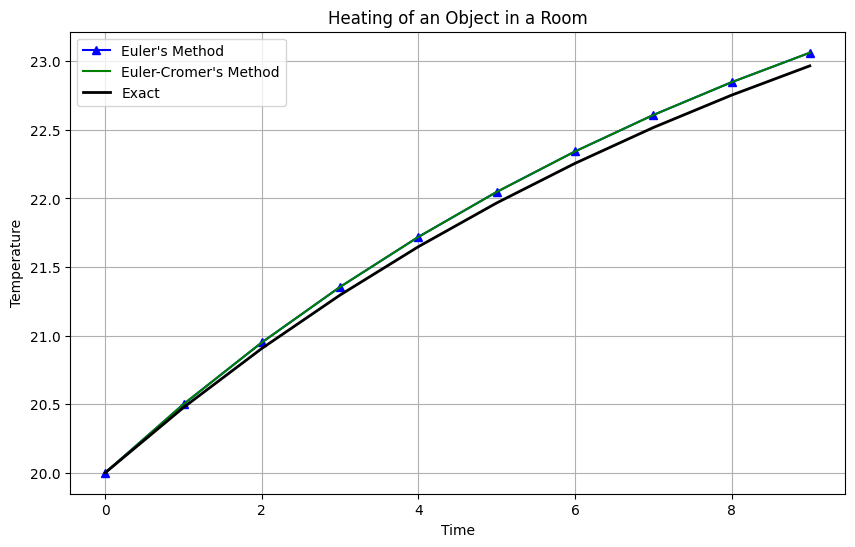

Time   |   Euler's Method Temperature   |   Euler-Cromer's Method Temperature   |   Exact Temperature   |   Euler's Method Error   |   Euler-Cromer's Method Error
------------------------------------------------------------------------------------------------------------------------
0.00  |  20.0000  |  20.0000  |  20.0000  |  0.0000  |  0.0000
1.00  |  20.5000  |  20.5000  |  20.4758  |  0.0242  |  0.0242
2.00  |  20.9500  |  20.9500  |  20.9063  |  0.0437  |  0.0437
3.00  |  21.3550  |  21.3550  |  21.2959  |  0.0591  |  0.0591
4.00  |  21.7195  |  21.7195  |  21.6484  |  0.0711  |  0.0711
5.00  |  22.0476  |  22.0476  |  21.9673  |  0.0802  |  0.0802
6.00  |  22.3428  |  22.3428  |  22.2559  |  0.0869  |  0.0869
7.00  |  22.6085  |  22.6085  |  22.5171  |  0.0914  |  0.0914
8.00  |  22.8477  |  22.8477  |  22.7534  |  0.0943  |  0.0943
9.00  |  23.0629  |  23.0629  |  22.9672  |  0.0957  |  0.0957


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cooling model
def newtons_law_of_cooling(T, t, k, T_room):
    return -k * (T - T_room)

# Define Euler's method
def euler(func, T, t, dt, k, T_room):
    dTdt = func(T, t, k, T_room)
    T_new = T + dTdt * dt
    return T_new

# Define Euler-Cromer's method
def euler_cromer(func, T, t, dt, k, T_room):
    dTdt = func(T, t, k, T_room)
    T_new = T + dTdt * dt
    return T_new

# Initial parameters
T0 = 20  # Initial temperature of the object
T_room = 25  # Room temperature
k = 0.1  # Cooling constant
t0 = 0  # Initial time
t_end = 10  # End time
dt = 1.0  # Time step size

# Exact solution
t_exact = np.arange(t0, t_end, dt)
T_exact = T_room + (T0 - T_room) * np.exp(-k * t_exact)

# Using Euler's method
t_euler = np.arange(t0, t_end, dt)
T_euler = np.zeros_like(t_euler)
T_euler[0] = T0
for i in range(1, len(t_euler)):
    T_euler[i] = euler(newtons_law_of_cooling, T_euler[i-1], t_euler[i-1], dt, k, T_room)

# Using Euler-Cromer's method
t_ec = np.arange(t0, t_end, dt)
T_ec = np.zeros_like(t_ec)
T_ec[0] = T0
for i in range(1, len(t_ec)):
    T_ec[i] = euler_cromer(newtons_law_of_cooling, T_ec[i-1], t_ec[i-1], dt, k, T_room)

# Calculate errors
errors_euler = np.abs(T_exact - T_euler)
errors_ec = np.abs(T_exact - T_ec)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_euler, T_euler, label="Euler's Method", linestyle='-',marker='^' ,color='blue')
plt.plot(t_ec, T_ec, label="Euler-Cromer's Method", linestyle='-', color='green')
plt.plot(t_exact, T_exact, label='Exact', color='black', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Heating of an Object in a Room')
plt.legend()
plt.grid(True)
plt.show()

# Display table
print("Time   |   Euler's Method Temperature   |   Euler-Cromer's Method Temperature   |   Exact Temperature   |   Euler's Method Error   |   Euler-Cromer's Method Error")
print("-" * 120)
for i in range(len(t_euler)):
    print("{:.2f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}".format(t_euler[i], T_euler[i], T_ec[i], T_exact[i], errors_euler[i], errors_ec[i]))


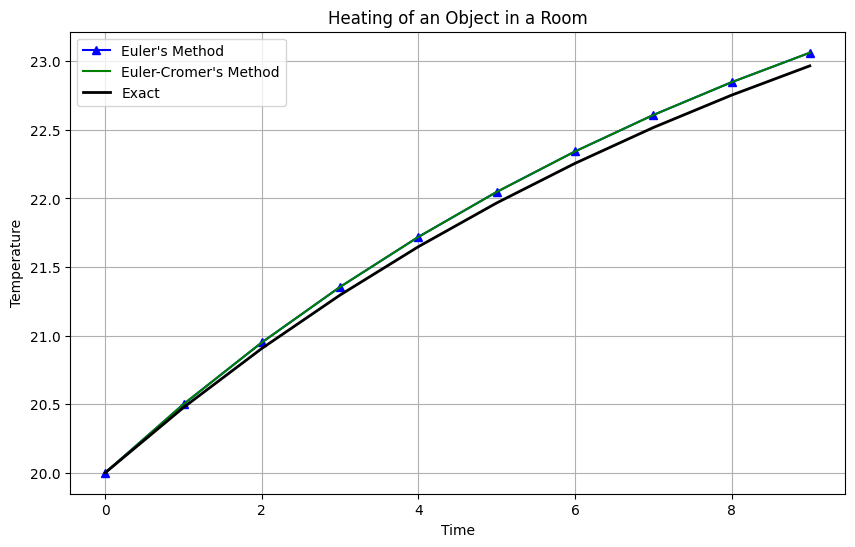

Time   |   Euler's Method Temperature   |   Euler-Cromer's Method Temperature   |   Exact Temperature   |   Euler's Method Error   |   Euler-Cromer's Method Error
------------------------------------------------------------------------------------------------------------------------
0.00  |  20.0000  |  20.0000  |  20.0000  |  0.0000  |  0.0000
1.00  |  20.5000  |  20.5000  |  20.4758  |  0.0242  |  0.0242
2.00  |  20.9500  |  20.9500  |  20.9063  |  0.0437  |  0.0437
3.00  |  21.3550  |  21.3550  |  21.2959  |  0.0591  |  0.0591
4.00  |  21.7195  |  21.7195  |  21.6484  |  0.0711  |  0.0711
5.00  |  22.0476  |  22.0476  |  21.9673  |  0.0802  |  0.0802
6.00  |  22.3428  |  22.3428  |  22.2559  |  0.0869  |  0.0869
7.00  |  22.6085  |  22.6085  |  22.5171  |  0.0914  |  0.0914
8.00  |  22.8477  |  22.8477  |  22.7534  |  0.0943  |  0.0943
9.00  |  23.0629  |  23.0629  |  22.9672  |  0.0957  |  0.0957


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def cooling_model(T, t, k, T_room):
    return -k * (T - T_room)

def euler_method(func, T, t, dt, k, T_room):
    dTdt = func(T, t, k, T_room)
    T_new = T + dTdt * dt
    return T_new

def euler_cromer_method(func, T, t, dt, k, T_room):
    dTdt = func(T, t, k, T_room)
    T_new = T + dTdt * dt
    return T_new

T0 = 20  
T_room = 25  
k = 0.1  
t0 = 0  
t_end = 10  
dt = 1.0  

t_exact = np.arange(t0, t_end, dt)
T_exact = T_room + (T0 - T_room) * np.exp(-k * t_exact)

t_euler = np.arange(t0, t_end, dt)
T_euler = np.zeros_like(t_euler)
T_euler[0] = T0
for i in range(1, len(t_euler)):
    T_euler[i] = euler_method(cooling_model, T_euler[i-1], t_euler[i-1], dt, k, T_room)

t_ec = np.arange(t0, t_end, dt)
T_ec = np.zeros_like(t_ec)
T_ec[0] = T0
for i in range(1, len(t_ec)):
    T_ec[i] = euler_cromer_method(cooling_model, T_ec[i-1], t_ec[i-1], dt, k, T_room)

errors_euler = np.abs(T_exact - T_euler)
errors_ec = np.abs(T_exact - T_ec)

plt.figure(figsize=(10, 6))
plt.plot(t_euler, T_euler, label="Euler's Method", linestyle='-', marker='^', color='blue')
plt.plot(t_ec, T_ec, label="Euler-Cromer's Method", linestyle='-', color='green')
plt.plot(t_exact, T_exact, label='Exact', color='black', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Heating of an Object in a Room')
plt.legend()
plt.grid(True)
plt.show()

print("Time   |   Euler's Method Temperature   |   Euler-Cromer's Method Temperature   |   Exact Temperature   |   Euler's Method Error   |   Euler-Cromer's Method Error")
print("-" * 120)
for i in range(len(t_euler)):
    print("{:.2f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}".format(t_euler[i], T_euler[i], T_ec[i], T_exact[i], errors_euler[i], errors_ec[i]))


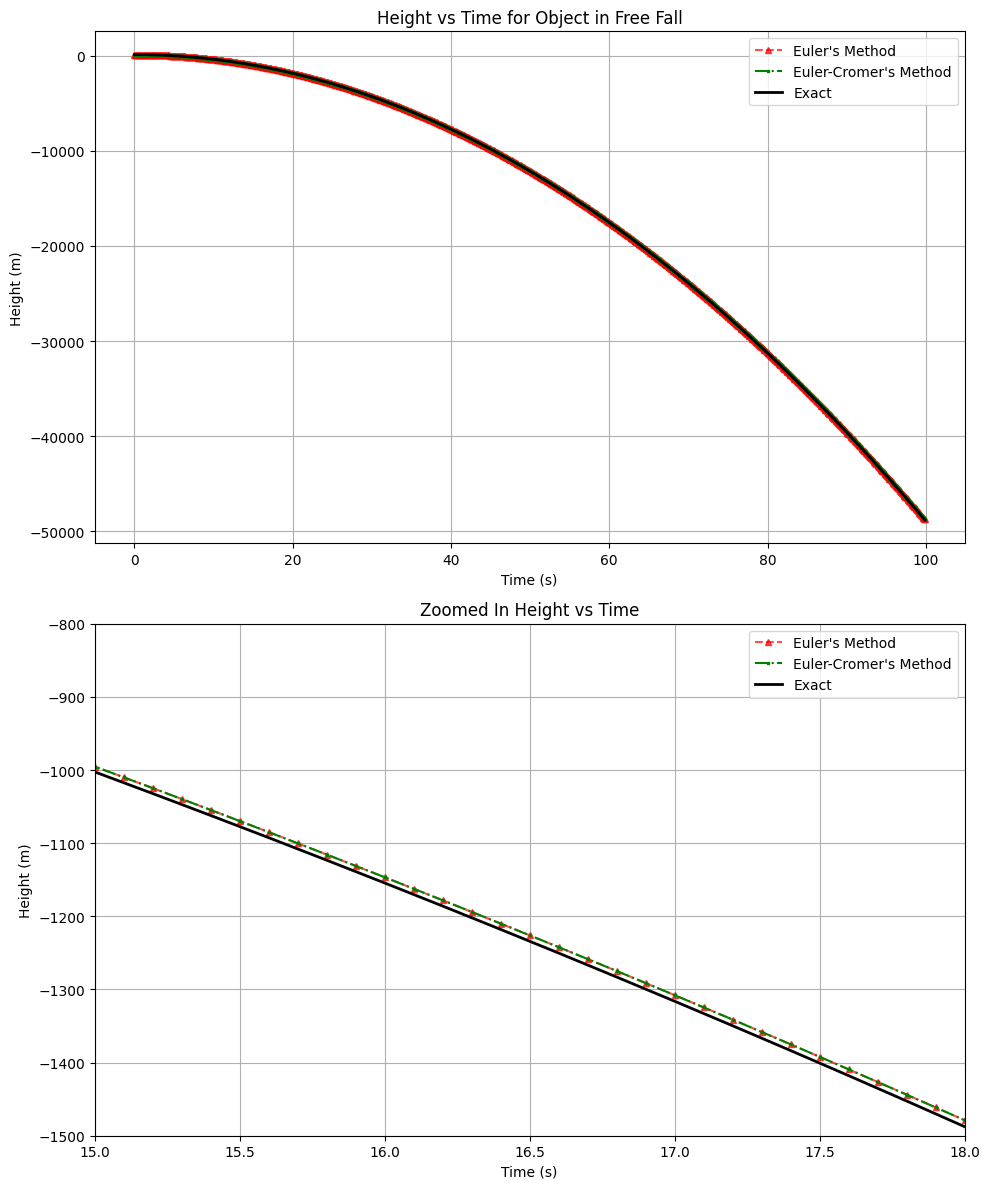

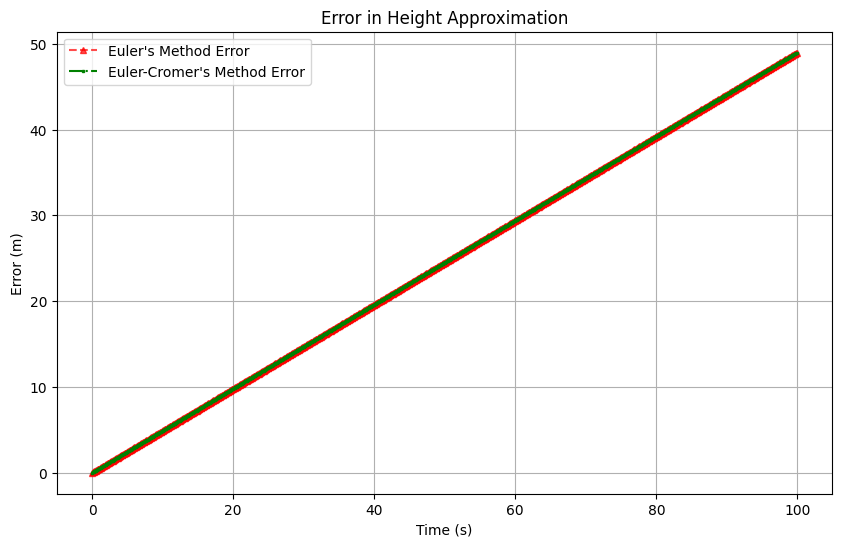

Time   |   Exact Height   |   Euler's Method Height   |   Euler-Cromer's Method Height   |   Euler's Method Error   |   Euler-Cromer's Method Error
---------------------------------------------------------------------------------------------------------------------------------------
0.00  |  100.0000  |  100.0000  |  100.0000  |  0.0000  |  0.0000
0.10  |  99.9510  |  100.0000  |  100.0000  |  0.0490  |  0.0490
0.20  |  99.8040  |  99.9020  |  99.9020  |  0.0980  |  0.0980
0.30  |  99.5590  |  99.7060  |  99.7060  |  0.1470  |  0.1470
0.40  |  99.2160  |  99.4120  |  99.4120  |  0.1960  |  0.1960
0.50  |  98.7750  |  99.0200  |  99.0200  |  0.2450  |  0.2450
0.60  |  98.2360  |  98.5300  |  98.5300  |  0.2940  |  0.2940
0.70  |  97.5990  |  97.9420  |  97.9420  |  0.3430  |  0.3430
0.80  |  96.8640  |  97.2560  |  97.2560  |  0.3920  |  0.3920
0.90  |  96.0310  |  96.4720  |  96.4720  |  0.4410  |  0.4410
1.00  |  95.1000  |  95.5900  |  95.5900  |  0.4900  |  0.4900
1.10  |  94.0710  

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constant acceleration due to gravity
g = 9.8  # m/s^2

# Define the equations of motion
def displacement(t, h0):
    return h0 - 0.5 * g * t**2

def velocity(t):
    return -g * t

# Define Euler's method for numerical integration
def euler_method(h0, dt, num_steps):
    t_values = np.linspace(0, dt * (num_steps - 1), num_steps)
    y_values = np.zeros(num_steps)
    v_values = np.zeros(num_steps)
    
    y_values[0] = h0
    
    for i in range(1, num_steps):
        y_values[i] = y_values[i-1] + velocity(t_values[i-1]) * dt
        v_values[i] = velocity(t_values[i])
    
    return t_values, y_values, v_values

# Define Euler-Cromer's method for numerical integration
def euler_cromer_method(h0, dt, num_steps):
    t_values = np.linspace(0, dt * (num_steps - 1), num_steps)
    y_values = np.zeros(num_steps)
    v_values = np.zeros(num_steps)
    
    y_values[0] = h0
    
    for i in range(1, num_steps):
        v_values[i] = velocity(t_values[i-1])
        y_values[i] = y_values[i-1] + v_values[i] * dt  # Use updated velocity here
    
    return t_values, y_values, v_values


# Initial conditions
h0 = 100  # Initial height in meters
dt = 0.1  # Time step size
num_steps = 1000  # Number of time steps

# Exact solution
t_exact = np.linspace(0, dt * (num_steps - 1), num_steps)
y_exact = displacement(t_exact, h0)
v_exact = velocity(t_exact)

# Using Euler's method
t_euler, y_euler, v_euler = euler_method(h0, dt, num_steps)

# Using Euler-Cromer's method
t_ec, y_ec, v_ec = euler_cromer_method(h0, dt, num_steps)

# Calculate errors
errors_euler = np.abs(y_exact - y_euler)
errors_ec = np.abs(y_exact - y_ec)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting Euler's method with larger, red circle markers
ax1.plot(t_euler, y_euler, label="Euler's Method", linestyle='dashed', marker='^', markersize=5, color='red', alpha=0.7)

# Plotting Euler-Cromer's method with larger, green square markers
ax1.plot(t_ec, y_ec, label="Euler-Cromer's Method", linestyle='-.', marker='s', markersize=2, color='green')

# Plotting original growth curve with a solid black line
ax1.plot(t_exact, y_exact, label='Exact', color='black', linewidth=2)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Height (m)')
ax1.set_title('Height vs Time for Object in Free Fall')
ax1.legend()
ax1.grid(True)

# Zoomed plot
zoom_region = (15, 18)  # Define the region you want to zoom in on
ax2.plot(t_euler, y_euler, label="Euler's Method", linestyle='dashed', marker='^', markersize=5, color='red', alpha=0.7)
ax2.plot(t_ec, y_ec, label="Euler-Cromer's Method", linestyle='-.', marker='s', markersize=2, color='green')
ax2.plot(t_exact, y_exact, label='Exact', color='black', linewidth=2)
ax2.set_xlim(*zoom_region)
ax2.set_ylim(-1500,-800)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Height (m)')
ax2.set_title('Zoomed In Height vs Time')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Plotting errors
plt.figure(figsize=(10, 6))
plt.plot(t_euler, errors_euler, label="Euler's Method Error", linestyle='dashed', marker='^', markersize=5, color='red', alpha=0.7)
plt.plot(t_ec, errors_ec, label="Euler-Cromer's Method Error",linestyle='-.', marker='s', markersize=2, color='green')
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.title('Error in Height Approximation')
plt.legend()
plt.grid(True)
plt.show()

# Display table
print("Time   |   Exact Height   |   Euler's Method Height   |   Euler-Cromer's Method Height   |   Euler's Method Error   |   Euler-Cromer's Method Error")
print("-" * 135)
for i in range(len(t_euler)):
    print("{:.2f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}".format(t_euler[i], y_exact[i], y_euler[i], y_ec[i], errors_euler[i], errors_ec[i]))


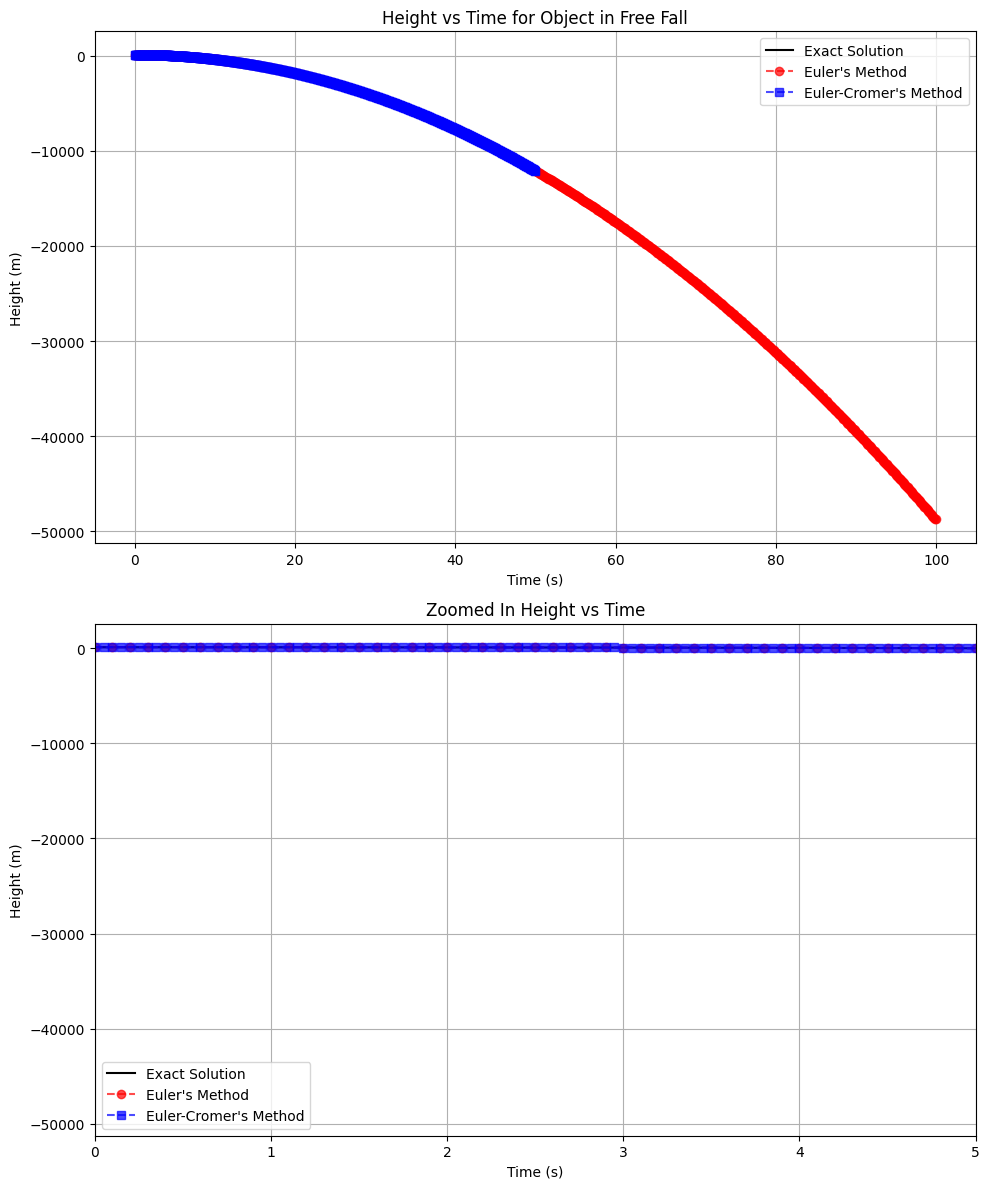

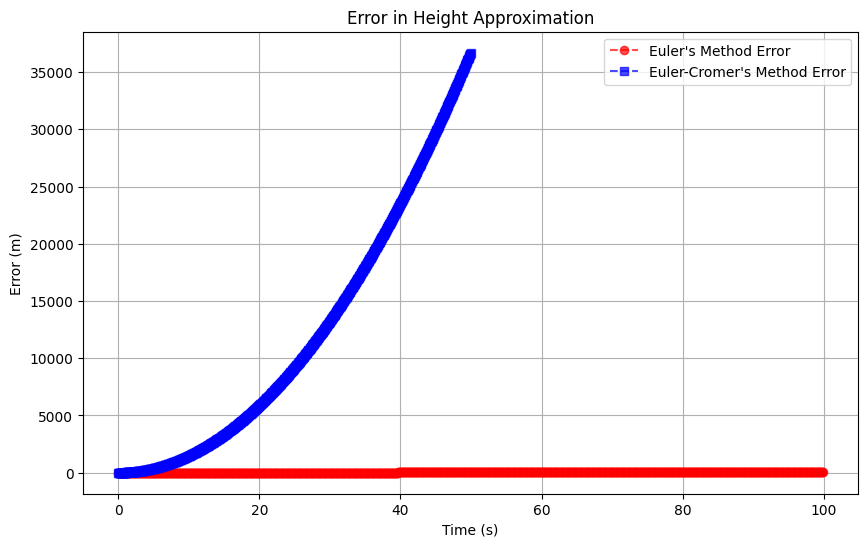

Time   |   Exact Height   |   Euler's Method Height   |   Euler-Cromer's Method Height   |   Euler's Method Error   |   Euler-Cromer's Method Error
---------------------------------------------------------------------------------------------------------------------------------------
0.00  |  100.0000  |  100.0000  |  100.0000  |  0.0000  |  0.0000
0.10  |  99.9510  |  100.0000  |  100.0000  |  0.0490  |  0.0490
0.20  |  99.8040  |  99.9020  |  99.9755  |  0.0980  |  0.1715
0.30  |  99.5590  |  99.7060  |  99.9265  |  0.1470  |  0.3675
0.40  |  99.2160  |  99.4120  |  99.8530  |  0.1960  |  0.6370
0.50  |  98.7750  |  99.0200  |  99.7550  |  0.2450  |  0.9800
0.60  |  98.2360  |  98.5300  |  99.6325  |  0.2940  |  1.3965
0.70  |  97.5990  |  97.9420  |  99.4855  |  0.3430  |  1.8865
0.80  |  96.8640  |  97.2560  |  99.3140  |  0.3920  |  2.4500
0.90  |  96.0310  |  96.4720  |  99.1180  |  0.4410  |  3.0870
1.00  |  95.1000  |  95.5900  |  98.8975  |  0.4900  |  3.7975
1.10  |  94.0710  

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define the constant acceleration due to gravity
g = 9.8  # m/s^2

# Define the equations of motion
def displacement(t, h0):
    return h0 - 0.5 * g * t**2

def velocity(t):
    return -g * t

# Define Euler's method for numerical integration
def euler_method(h0, dt, num_steps):
    t_values = np.linspace(0, dt * (num_steps - 1), num_steps)
    y_values = np.zeros(num_steps)
    v_values = np.zeros(num_steps)
    
    y_values[0] = h0
    
    for i in range(1, num_steps):
        y_values[i] = y_values[i-1] + velocity(t_values[i-1]) * dt
        v_values[i] = velocity(t_values[i])
    
    return t_values, y_values, v_values

# Define Euler-Cromer's method for numerical integration
def euler_cromer_method(h0, dt, num_steps):
    t_values = np.linspace(0, dt * (num_steps - 1), num_steps)
    y_values = np.zeros(num_steps)
    v_values = np.zeros(num_steps)
    
    y_values[0] = h0
    
    for i in range(1, num_steps):
        v_values[i-1] = velocity(t_values[i-1])
        y_values[i] = y_values[i-1] + v_values[i-1] * dt
        v_values[i] = velocity(t_values[i])
    
    return t_values, y_values, v_values

# Initial conditions
h0 = 100  # Initial height in meters
dt_euler = 0.1  # Time step size for Euler's method
dt_ec = 0.05  # Time step size for Euler-Cromer's method
num_steps = 1000  # Number of time steps

# Exact solution
t_exact = np.linspace(0, dt_euler * (num_steps - 1), num_steps)
y_exact = displacement(t_exact, h0)
v_exact = velocity(t_exact)

# Using Euler's method
t_euler, y_euler, v_euler = euler_method(h0, dt_euler, num_steps)

# Using Euler-Cromer's method
t_ec, y_ec, v_ec = euler_cromer_method(h0, dt_ec, num_steps)

# Calculate errors
errors_euler = np.abs(y_exact - y_euler)
errors_ec = np.abs(y_exact - y_ec)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting main graph
ax1.plot(t_exact, y_exact, label='Exact Solution', color='black')
ax1.plot(t_euler, y_euler, label="Euler's Method", linestyle='dashed', marker='o', color='red', alpha=0.7)
ax1.plot(t_ec, y_ec, label="Euler-Cromer's Method", linestyle='dashed', marker='s', color='blue', alpha=0.7)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Height (m)')
ax1.set_title('Height vs Time for Object in Free Fall')
ax1.legend()
ax1.grid(True)

# Zoomed plot
zoom_region = (0, 5)  # Define the region you want to zoom in on
ax2.plot(t_exact, y_exact, label='Exact Solution', color='black')
ax2.plot(t_euler, y_euler, label="Euler's Method", linestyle='dashed', marker='o', color='red', alpha=0.7)
ax2.plot(t_ec, y_ec, label="Euler-Cromer's Method", linestyle='dashed', marker='s', color='blue', alpha=0.7)
ax2.set_xlim(*zoom_region)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Height (m)')
ax2.set_title('Zoomed In Height vs Time')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Plotting errors
plt.figure(figsize=(10, 6))
plt.plot(t_euler, errors_euler, label="Euler's Method Error", linestyle='dashed', marker='o', color='red', alpha=0.7)
plt.plot(t_ec, errors_ec, label="Euler-Cromer's Method Error", linestyle='dashed', marker='s', color='blue', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.title('Error in Height Approximation')
plt.legend()
plt.grid(True)
plt.show()

# Display table
print("Time   |   Exact Height   |   Euler's Method Height   |   Euler-Cromer's Method Height   |   Euler's Method Error   |   Euler-Cromer's Method Error")
print("-" * 135)
for i in range(len(t_euler)):
    print("{:.2f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}".format(t_euler[i], y_exact[i], y_euler[i], y_ec[i], errors_euler[i], errors_ec[i]))


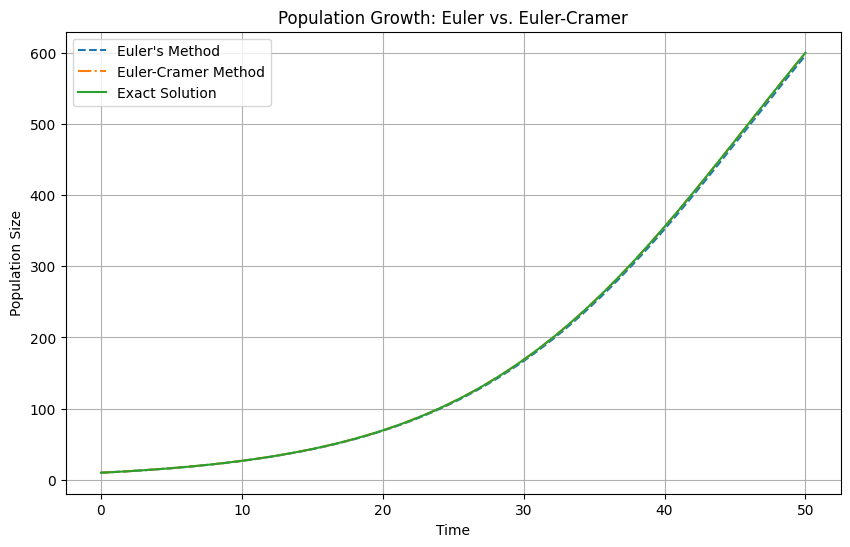

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 0.1  # Intrinsic growth rate
K = 1000  # Carrying capacity
t_max = 50  # Maximum time
dt = 0.1  # Time step size

# Function for the differential equation (logistic growth)
def logistic_growth(P, t):
    return r * P * (1 - P / K)

# Euler's method for solving ODE
def euler_method(func, P0, t):
    P = np.zeros_like(t)
    P[0] = P0
    for i in range(1, len(t)):
        P[i] = P[i-1] + func(P[i-1], t[i-1]) * (t[i] - t[i-1])
    return P

# Euler-Cramer method for solving ODE
def euler_cramer_method(func, P0, t):
    P = np.zeros_like(t)
    P[0] = P0
    for i in range(1, len(t)):
        P_pred = P[i-1] + func(P[i-1], t[i-1]) * (t[i] - t[i-1])  # Euler's prediction
        P[i] = P[i-1] + 0.5 * ((func(P[i-1], t[i-1]) + func(P_pred, t[i])) * (t[i] - t[i-1]))
    return P

# Time array
t = np.arange(0, t_max, dt)

# Solve using Euler's method
P_euler = euler_method(logistic_growth, 10, t)

# Solve using Euler-Cramer method
P_euler_cramer = euler_cramer_method(logistic_growth, 10, t)

# Exact solution (analytical solution)
t_exact = np.linspace(0, t_max, 100)
P_exact = K / (1 + ((K - 10) / 10) * np.exp(-r * t_exact))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, P_euler, label="Euler's Method", linestyle='--')
plt.plot(t, P_euler_cramer, label="Euler-Cramer Method", linestyle='-.')
plt.plot(t_exact, P_exact, label="Exact Solution", linestyle='-')
plt.title('Population Growth: Euler vs. Euler-Cramer')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)
plt.show()


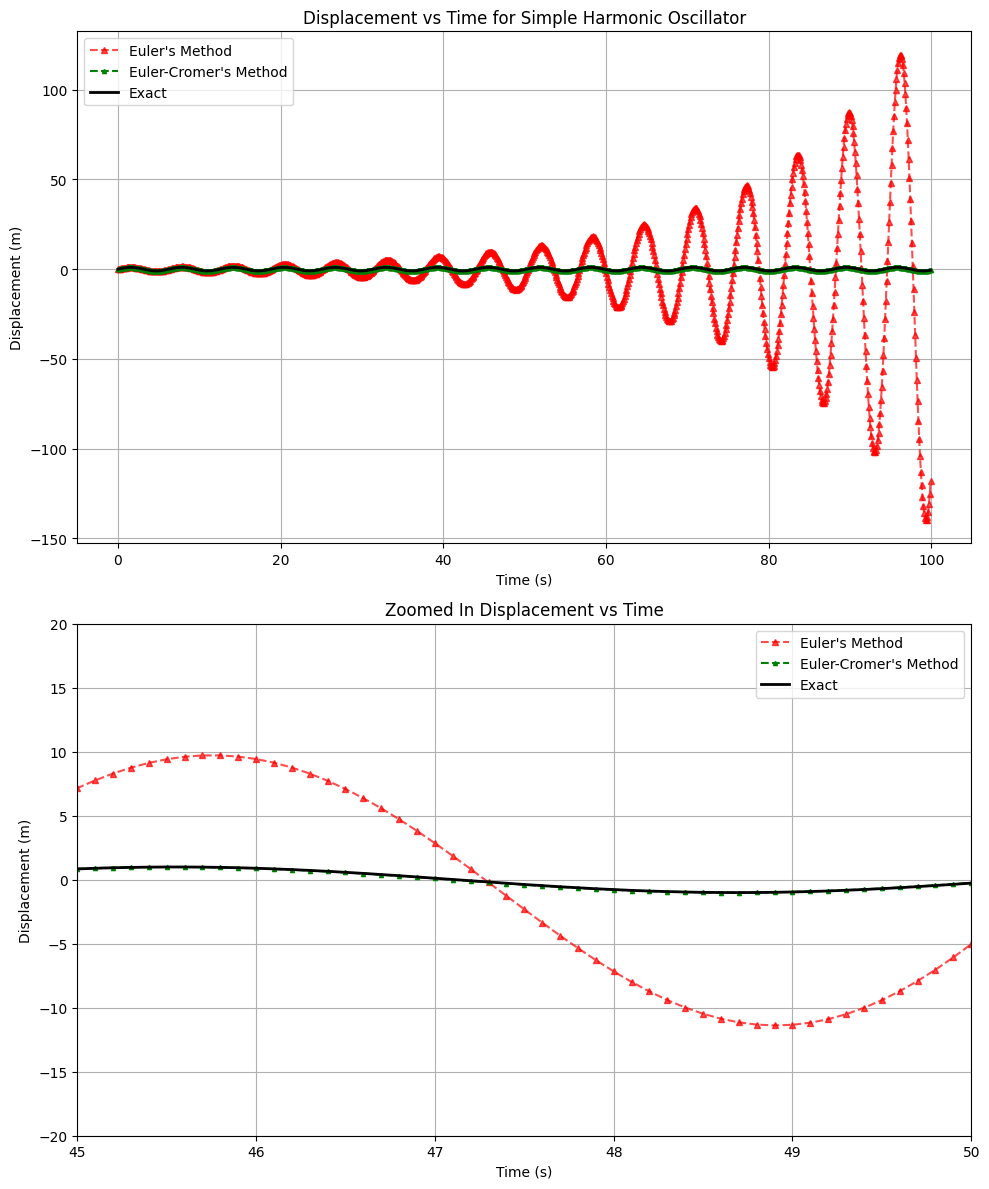

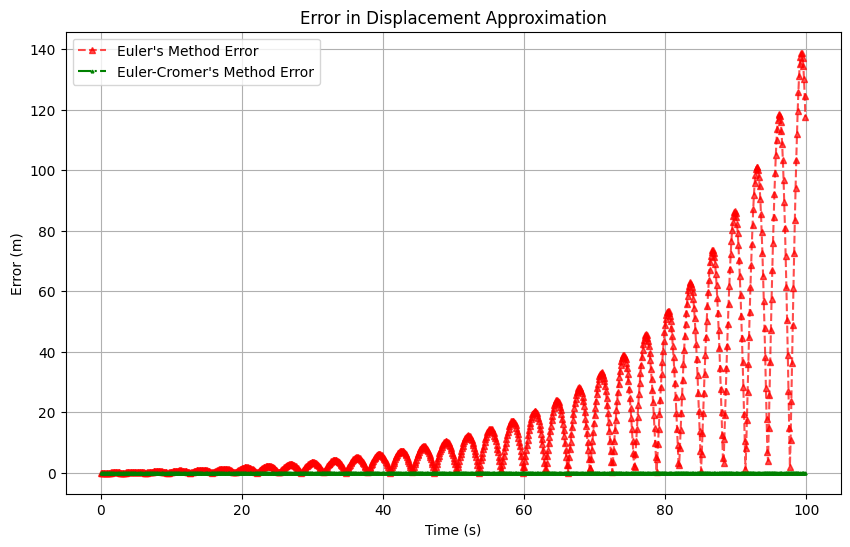

Time   |   Exact Displacement   |   Euler's Method Displacement   |   Euler-Cromer's Method Displacement   |   Euler's Method Error   |   Euler-Cromer's Method Error
----------------------------------------------------------------------------------------------------------------------------------------------------------------
0.00  |  0.0000  |  0.0000  |  0.0000  |  0.0000  |  0.0000
0.10  |  0.0998  |  0.1000  |  0.1000  |  0.0002  |  0.0002
0.20  |  0.1987  |  0.2000  |  0.1990  |  0.0013  |  0.0003
0.30  |  0.2955  |  0.2990  |  0.2960  |  0.0035  |  0.0005
0.40  |  0.3894  |  0.3960  |  0.3901  |  0.0066  |  0.0006
0.50  |  0.4794  |  0.4900  |  0.4802  |  0.0106  |  0.0008
0.60  |  0.5646  |  0.5801  |  0.5656  |  0.0154  |  0.0009
0.70  |  0.6442  |  0.6652  |  0.6452  |  0.0210  |  0.0010
0.80  |  0.7174  |  0.7446  |  0.7185  |  0.0272  |  0.0011
0.90  |  0.7833  |  0.8173  |  0.7845  |  0.0339  |  0.0012
1.00  |  0.8415  |  0.8825  |  0.8428  |  0.0410  |  0.0013
1.10  |  0.89

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the spring constant and mass
k = 1  # N/m
m = 1  # kg

# Define the equations of motion
def displacement(t, A, omega):
    return A * np.sin(omega * t)

def velocity(t, A, omega):
    return A * omega * np.cos(omega * t)

def acceleration(x, k, m):
    return -k/m * x

# Define Euler's method for numerical integration
def euler_method(A, omega, dt, num_steps):
    t_values = np.linspace(0, dt * (num_steps - 1), num_steps)
    x_values = np.zeros(num_steps)
    v_values = np.zeros(num_steps)
    
    x_values[0] = displacement(0, A, omega)
    v_values[0] = velocity(0, A, omega)
    
    for i in range(1, num_steps):
        v_values[i] = v_values[i-1] + acceleration(x_values[i-1], k, m) * dt
        x_values[i] = x_values[i-1] + v_values[i-1] * dt
    
    return t_values, x_values, v_values

# Define Euler-Cromer's method for numerical integration
def euler_cromer_method(A, omega, dt, num_steps):
    t_values = np.linspace(0, dt * (num_steps - 1), num_steps)
    x_values = np.zeros(num_steps)
    v_values = np.zeros(num_steps)
    
    x_values[0] = displacement(0, A, omega)
    v_values[0] = velocity(0, A, omega)
    
    for i in range(1, num_steps):
        v_values[i] = v_values[i-1] + acceleration(x_values[i-1], k, m) * dt
        x_values[i] = x_values[i-1] + v_values[i] * dt  # Use updated velocity here
    
    return t_values, x_values, v_values



# Initial conditions
A = 1  # Amplitude in meters
omega = 1  # Angular frequency in rad/s
dt = 0.1  # Time step size
num_steps = 1000  # Number of time steps

# Exact solution
t_exact = np.linspace(0, dt * (num_steps - 1), num_steps)
x_exact = displacement(t_exact, A, omega)
v_exact = velocity(t_exact, A, omega)

# Using Euler's method
t_euler, x_euler, v_euler = euler_method(A, omega, dt, num_steps)

# Using Euler-Cromer's method
t_ec, x_ec, v_ec = euler_cromer_method(A, omega, dt, num_steps)

# Calculate errors
errors_euler = np.abs(x_exact - x_euler)
errors_ec = np.abs(x_exact - x_ec)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plotting Euler's method with larger, red circle markers
ax1.plot(t_euler, x_euler, label="Euler's Method", linestyle='dashed', marker='^', markersize=5, color='red', alpha=0.7)

# Plotting Euler-Cromer's method with larger, green square markers
ax1.plot(t_ec, x_ec, label="Euler-Cromer's Method", linestyle='dashed', marker='^', markersize=3, color='green')

# Plotting original growth curve with a solid black line
ax1.plot(t_exact, x_exact, label='Exact', color='black', linewidth=2)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Displacement (m)')
ax1.set_title('Displacement vs Time for Simple Harmonic Oscillator')
ax1.legend()
ax1.grid(True)

# Zoomed plot
zoom_region = (45, 50)  # Define the region you want to zoom in on
ax2.plot(t_euler, x_euler, label="Euler's Method", linestyle='dashed', marker='^', markersize=5, color='red', alpha=0.7)
ax2.plot(t_ec, x_ec, label="Euler-Cromer's Method", linestyle='dashed', marker='^', markersize=3, color='green')
ax2.plot(t_exact, x_exact, label='Exact', color='black', linewidth=2)
ax2.set_xlim(*zoom_region)
ax2.set_ylim(-20,20)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Displacement (m)')
ax2.set_title('Zoomed In Displacement vs Time')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


# Plotting errors
plt.figure(figsize=(10, 6))
plt.plot(t_euler, errors_euler, label="Euler's Method Error", linestyle='dashed', marker='^', markersize=5, color='red', alpha=0.7)
plt.plot(t_ec, errors_ec, label="Euler-Cromer's Method Error",linestyle='-.', marker='^', markersize=2, color='green')
plt.xlabel('Time (s)')
plt.ylabel('Error (m)')
plt.title('Error in Displacement Approximation')
plt.legend()
plt.grid(True)
plt.show()

# Display table
print("Time   |   Exact Displacement   |   Euler's Method Displacement   |   Euler-Cromer's Method Displacement   |   Euler's Method Error   |   Euler-Cromer's Method Error")
print("-" * 160)
for i in range(len(t_euler)):
    print("{:.2f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}  |  {:.4f}".format(t_euler[i], x_exact[i], x_euler[i], x_ec[i], errors_euler[i], errors_ec[i]))

